<h3> Importing packages<h3>

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

<h3> Classifieres </h3>

In [2]:
faceClassifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyeClassifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
smileClassifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

<h3> Face detection</h3>

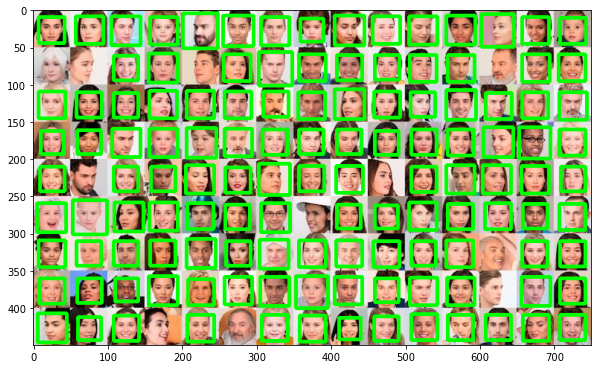

In [ ]:
img = cv2.imread("faces.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))

faces = faceClassifier.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,minSize=(5,5))
for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w, y+h),(0,255,0),3)

plt.imshow(img[:,:,::-1])

<h3> Face, eyes, and smile detection </h3>

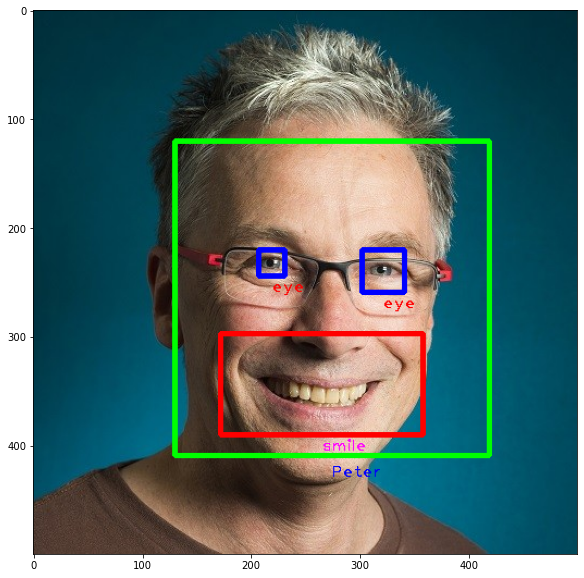

In [ ]:


img = cv2.imread("image.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 10))

face = faceClassifier.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5, minSize=(5,5))

for fx,fy,fw,fh in face:
    cv2.rectangle(img,(fx,fy),(fx+fw, fy+fh),(0,255,0),3)
    fa, fb = fx+fw/2, fy+fh+20
    cv2.putText(img, "Peter", (int(fa),int(fb)), 1, 1, (255,0,0), 1, cv2.LINE_4 )
    
    Face = gray[fy:fy+fh,fx:fx+fw]
    eyes = eyeClassifier.detectMultiScale(Face,scaleFactor=1.05,minNeighbors=5,minSize=(5,5))
    
    for ex,ey,ew,eh in eyes:
        ea, eb = fx+ex+ew/2, fx+ey+eh+5
        cv2.rectangle(img,(fx+ex,fy+ey),(fx+ex+ew,fy+ey+eh),(255,0,0),3)
        cv2.putText(img, "eye", (int(ea),int(eb)), 1, 1, (0,0,255), 1, cv2.LINE_4 )        
    
        smiles = smileClassifier.detectMultiScale(Face,1.2, 4,minSize=(80,80))
        
        for sx,sy,sw,sh in smiles:
            sa, sb = fx+sx+sw/2, fx+sy+sh+5
            cv2.rectangle(img,(fx+sx,fy+sy),(fx+sx+sw,fy+sy+sh),(0,0,255),3)
            cv2.putText(img, "smile", (int(sa),int(sb)), 1, 1, (255,0,255), 1, cv2.LINE_4 )        



plt.imshow(img[:,:,::-1])

<h3>Face, Smile, and Eye classifier from webcam </h3>

In [3]:
img = cv2.VideoCapture(0)
while img.isOpened():
    _, frame = img.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    face = faceClassifier.detectMultiScale(gray, 1.2,5, minSize=(5,5))
    
    for fx,fy,fw,fh in face:
        cv2.rectangle(frame,(fx,fy),(fx+fw, fy+fh),(0,255,0),3)
        fa, fb = fx+fw/2, fy+fh+20
        cv2.putText(frame, "MZ", (int(fa),int(fb)), 1, 1, (255,0,0), 1, cv2.LINE_4 )

        Face = gray[fy:fy+fh,fx:fx+fw]
        
        eyes = eyeClassifier.detectMultiScale(Face,1.03,5,minSize=(5,5))
        
        for ex,ey,ew,eh in eyes:
            ea, eb = fx+ex+ew/2, fx+ey+eh/2
            e, b = fx+ex+ew/2, fx+ey+eh+5
            cv2.circle(frame, (int(ea), int(eb)), int(eh/2), (0,255,0), 2)
            cv2.putText(frame, "eye", (int(e),int(b)), 1, 1, (0,0,255), 1, cv2.LINE_4 )        

            smiles = smileClassifier.detectMultiScale(Face,1.2, 4,minSize=(50,50))

            for sx,sy,sw,sh in smiles:
                sa, sb = fx+sx+sw/2, fx+sy+sh+5
                cv2.rectangle(frame,(fx+sx,fy+sy),(fx+sx+sw,fy+sy+sh),(0,0,255),3)
                cv2.putText(frame, "smile", (int(sa),int(sb)), 1, 1, (255,0,255), 1, cv2.LINE_4 )        

    
    
    cv2.imshow('MZ_IMAGE', frame)
    
    k = cv2.waitKey(1)
    if k == ord('q'):
        break

img.release()
cv2.destroyAllWindows()
